## Données de séquence pour étudier les mutations cancéreuses

Pendant le cours, vous avez étudié comment, dans le séquençage à haut débit, les reads doivent être mappés sur le génome humain. 
On va faire un calcul simple pour estimer le nombre d'opérations qui sont nécessaires. Ici, nous ne considérons que les exons [https://en.wikipedia.org/wiki/Exome_sequencing] si nous incluions également les introns, le nombre d'opérations serait beaucoup plus grand, pourquoi ?

Le génome humain contient environ 20 000 gènes codants. Supposons que la longueur moyenne des exons soit de 1000 nucléotides et que longueur d'un read soit de 100 paires de bases [100bp].

**Question 1)** Quel est le nombre approximatif d'opérations pour mapper un read ? Et 10^6 reads (le output typique d'une machine à haut débit) ? 

Pour votre connaissance, la longueur d'un read dépend de la technologie de séquençage. La longueur typique pour le séquençage Illumina (l'une des plus utilisées dans le monde) est de ~80 paires de bases [80bp].

Voici à quoi ressemble la sortie d'une machine de séquençage (file *.fastq*). 

**Question 2)** Pouvez-vous dire la signification de chaque ligne ? (https://en.wikipedia.org/wiki/FASTQ_format)

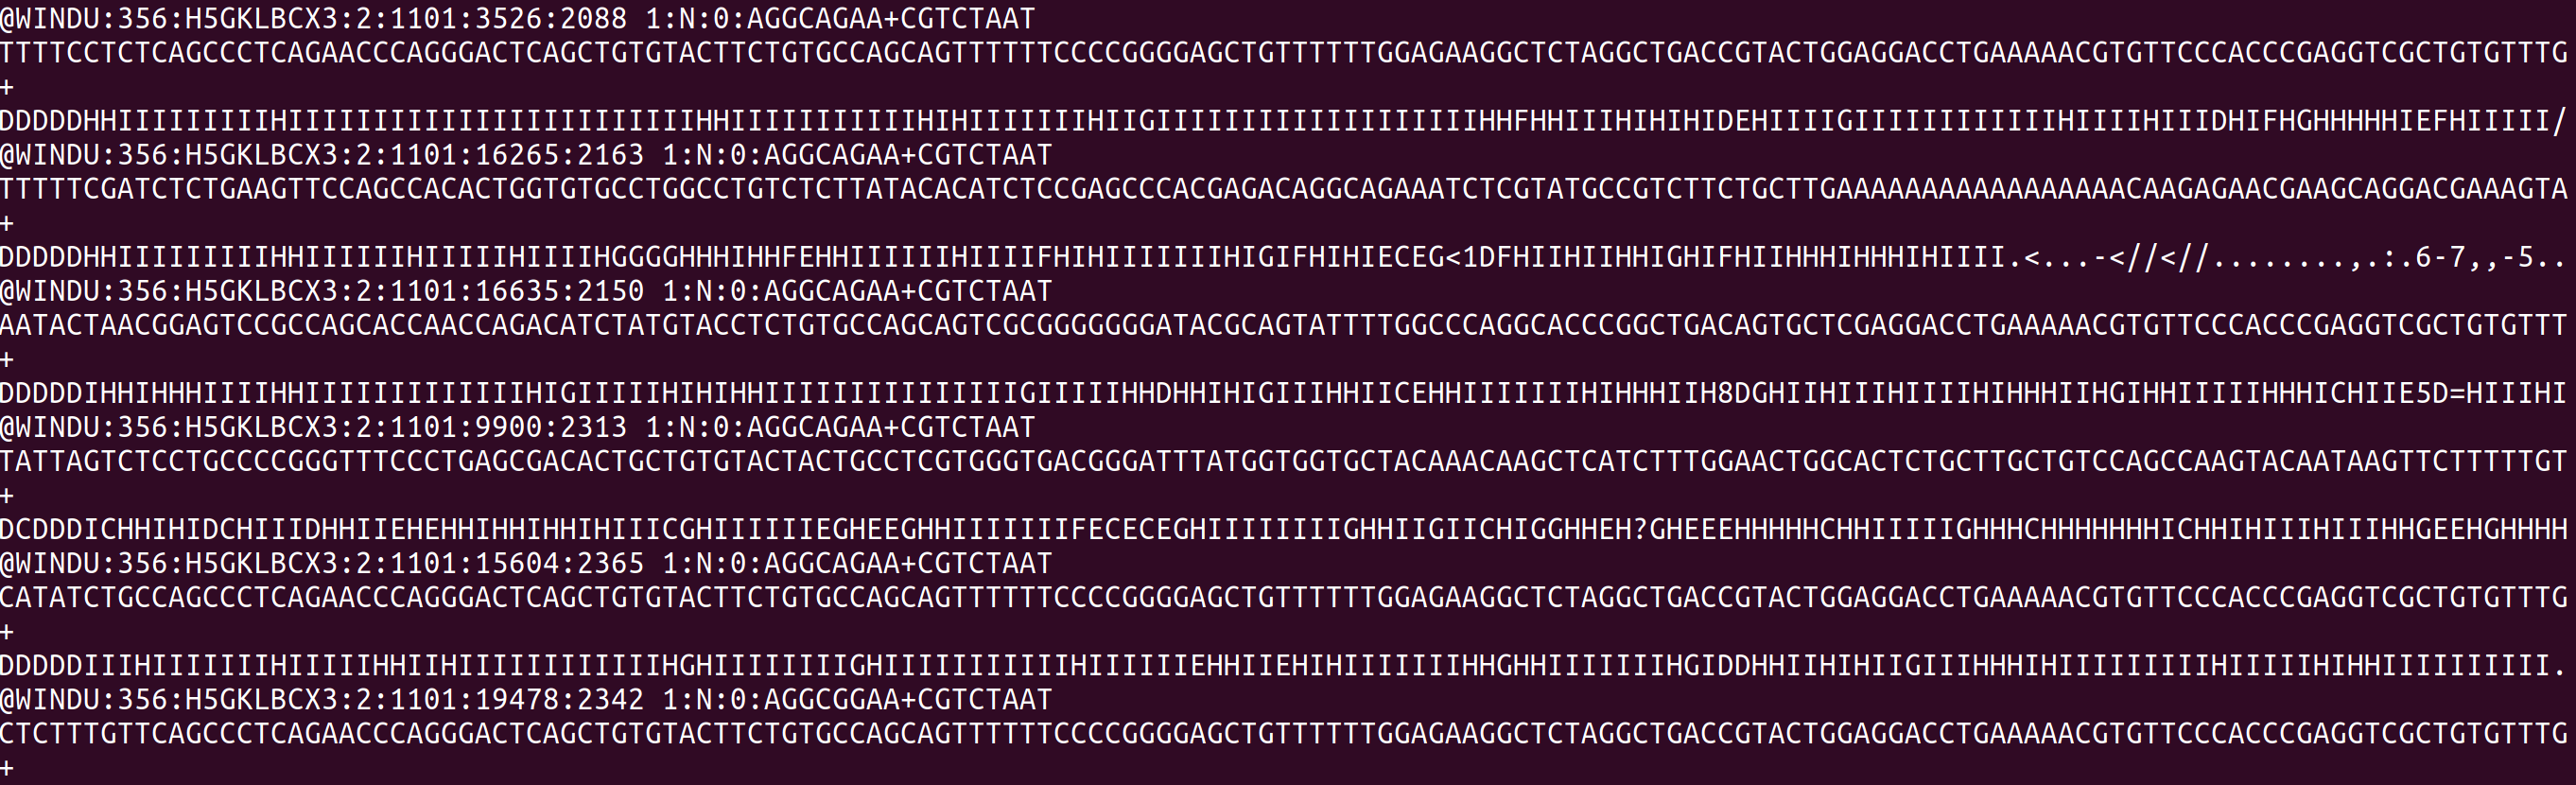

## Analyse des mutations du patient TCGA-D9-A1JX 


#### Update: TCGA released a new version on Sep 28, 2022
        7e6151f4-ec8b-4b8c-8676-00e1084f9db5 Current_Version 2022-09-28	
        97cf696c-5633-4fbd-9ed8-680599947dcc Version_1 2022-03-29

Dans ce tutorial, nous nous concentrerons sur les mutations potentiellement cancérogènes du patient TCGA-D9-A1JX.

1. Accédez au site Web du TCGA (https://portal.gdc.cancer.gov/) et recherchez les données du patient TCGA-D9-A1JX. Cliquez sur "Files" en haut à droite. De nombreuses données sont disponibles pour ces patients. Expliquez-les brièvement.
2. Nous recherchons des fichiers *.maf*. Les fichiers *.maf* (Mutation Annotation Format) sont des fichiers qui contiennent des annotations de mutations somatiques et/ou germinales. Pour des raisons de confidentialité, les fichiers *.maf* contenant des annotations de mutations germinales sont protégés et distribués en accès contrôlé. Les fichiers *.maf* contenant uniquement des mutations somatiques sont accessibles au public (plus d'info  https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/)

3. Il n'y a qu'un seul fichier *.maf* accessible au public: 3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf.gz 

3. Téléchargez-le et decompressez-le. Ouvrez le dossier et, encore une fois, decompressez le fichier 3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf.gz
4. Placez le fichier 3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf dans 'Week2' de la page Jupyter.

Nous utiliserons python pour analyser ce fichier et effectuer une analyse statistique.

In [1]:
# Simple analysis with python
import pandas as pd                                                                                                                                                                                       
import plotly.express as px

df = pd.read_csv("./3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf", sep = '\t', comment = '#')  
print(df)
#Les fichiers contiennent de nombreuses colonnes (140). Essayez de comprendre lesquelles sont les plus importantes

    Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0        CDK11A          728642     BI     GRCh38       chr1         1703896   
1         HSPG2            3339     BI     GRCh38       chr1        21875655   
2       C1orf94           84970     BI     GRCh38       chr1        34212343   
3        CFAP57          149465     BI     GRCh38       chr1        43183645   
4       CYP4A11            1579     BI     GRCh38       chr1        46938008   
..          ...             ...    ...        ...        ...             ...   
205         MN1            4330     BI     GRCh38      chr22        27796797   
206       CRLF2           64109     BI     GRCh38       chrX         1202417   
207        TAB3          257397     BI     GRCh38       chrX        30831534   
208        HEPH            9843     BI     GRCh38       chrX        66255117   
209      MAGEE2          139599     BI     GRCh38       chrX        75784758   

     End_Position Strand Variant_Classi

**Question 3)** Quels sont les chromosomes les plus mutés ? (utilisez les fonctions value_counts() et px.bar() que nous avons vue la semaine dernière)

**Question 4)** Faites le même plot pour étudier de "Variant_Classification" et décrivez-le

**Question 5)** pouvez-vous faire un plot pour décrire en même temps sur quel chromosome et quel type de mutations a ce patient ? Utilisez px.bar et le label "color" que nous avons vue la semaine dernière

##  Missense mutations
**Question 6)** Expliquez pourquoi les missense mutations sont potentiellement dangereuses. Et les mutations synonymes ?

Vous trouverez ici les mutations pour ce patient : https://portal.gdc.cancer.gov/cases/f505058f-74f2-4476-887f-06590a605980 (en bas de la page)

Le patient a une mutation missense dans le gène BRAF. Vous devriez trouver : 

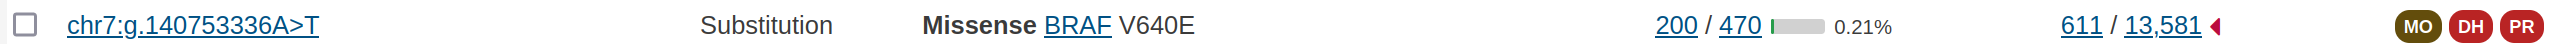

**Question 7)** Que signifie chr7 ? Et le nombre après ? Assurez-vous de comprendre chaque entrée. 
Vous avez vu ce gène et cette mutation dans la leçon, pouvez-vous vous rappeler pourquoi c'est important ?

Considérons d'autres mutations missense. 
Par exemple, focalisons-nous sur les mutations **Q61R sur le gène NRAS** et **S163L sur le gène OR51B2** qui se produisent souvent chez les patients présentant un cancer.

**Question 8)** Une mutation missense n'est pas nécessairement dangereuse! Si le même acide aminé a été observée chez d'autres espèces proches de l'Homo Sapiens, elle n'aura probablement pas d'impact sur la fonctionnalité de la protéine correspondante. Pourquoi? 

Pour vérifier cela, nous utiliserons la plus grande base de données mondiale de séquences de protéines, qui s'appelle Uniprot (https://www.uniprot.org/). Uniprot est une ressource très utile pour l'analyse de séquences (une courte description ici https://fr.wikipedia.org/wiki/UniProt). Assurez-vous de comprendre quelles données il contient. Si vous le souhaitez, n'hésitez pas à consulter les tutoriels (https://www.ebi.ac.uk/training/online/courses/uniprot-quick-tour/#vf-tabs__section--overview)


**Question 9)** Trouvez les gènes NRAS dans Uniprot. Combien d'acides aminés il y a dans NRAS?  *N.B. NRAS est le nom du gène, la protéine peut avoir un nom différent!*

Pour comprendre si le même acides aminé a été observé chez des espèces proches de l'Homo Sapiens il faut identifier les séquences dites homologues. Dans Uniprot, il existe un outil simple pour les identifier, qui s'appelle BLAST :
https://www.ebi.ac.uk/training/online/courses/uniprot-exploring-protein-sequence-and-functional-info/how-to-use-uniprot-tools-clone/blast-sequence-similarity-searching/

Nous pouvons lancer une recherche BLAST directement sur Uniprot. Cliquez sur BLAST botton (en haut à gauche), cela ouvrira la page de recherche BLAST. Nous utiliserons les paramètres standard, il suffit donc de cliquer sur « RUN BLAST » pour lancer la recherche

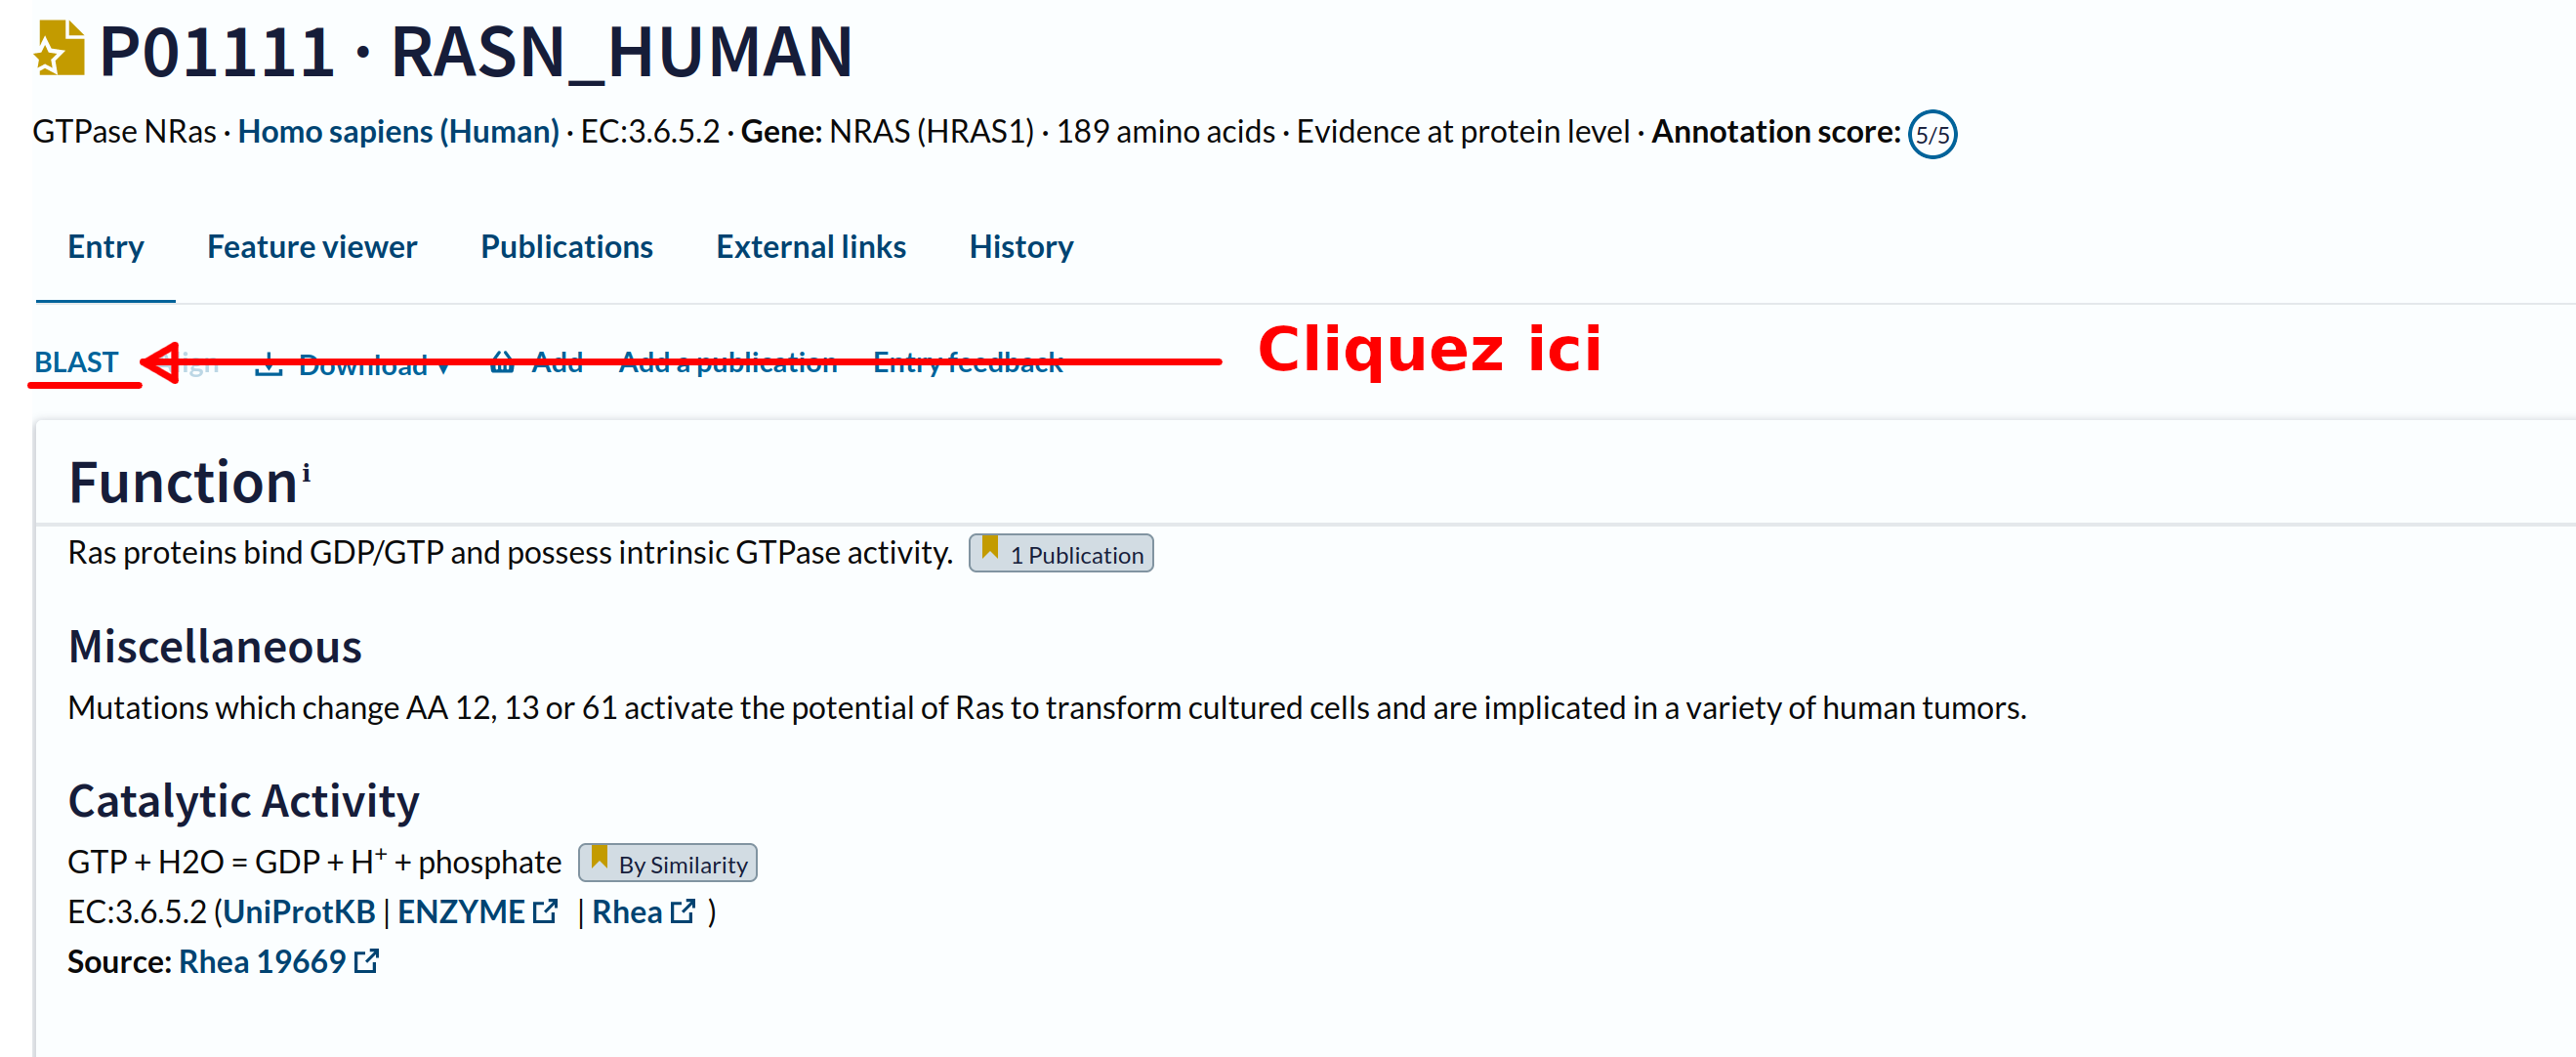

**Question 10)** Nous nous concentrerons sur **NRAS** et étudierons la mutation **Q61R**. Exécutez une recherche Blast sur Uniprot pour Q61R (cela prendra quelques minutes). Comment sont triées les séquences ? La sortie doit être :

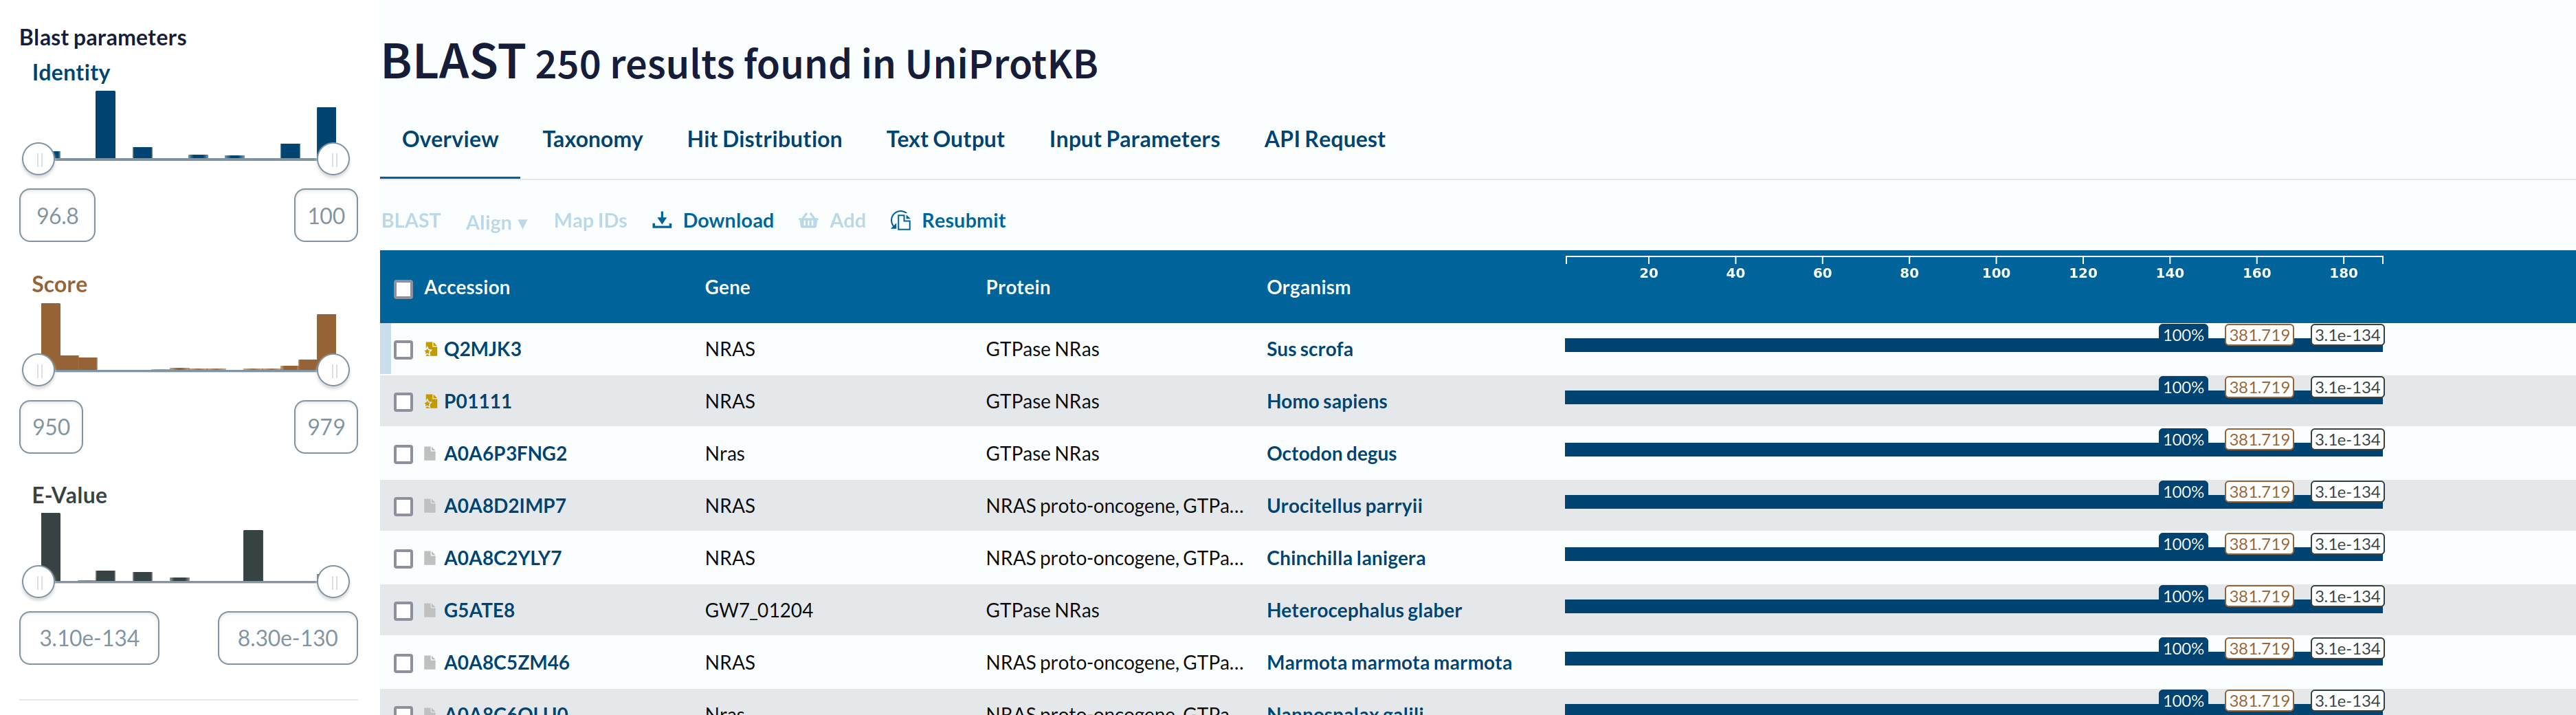

**Question 11)** Sélectionnez des séquences des espèces proches de l'Homo Sapiens. Par example:
- P01111 - Homo sapiens
- Q2MJK3 - Sus scrofa
- A0A8C5ZM46 - Marmota marmota marmota
- A0A8I3PXY1 - Canis lupus familiaris
- A0A673VCM0 - Suricata suricatta
- A0A8C7EHE9 - Nothoprocta perdicaria
- A0A7L0K117 - Chauna torquata

et alignez-les (cliquez sur le bouton "Align"). Identifiez notre résidu d'intérêt (position Q61). Est-il variable ou conservé ? Que pensez-vous que cela peut signifier?

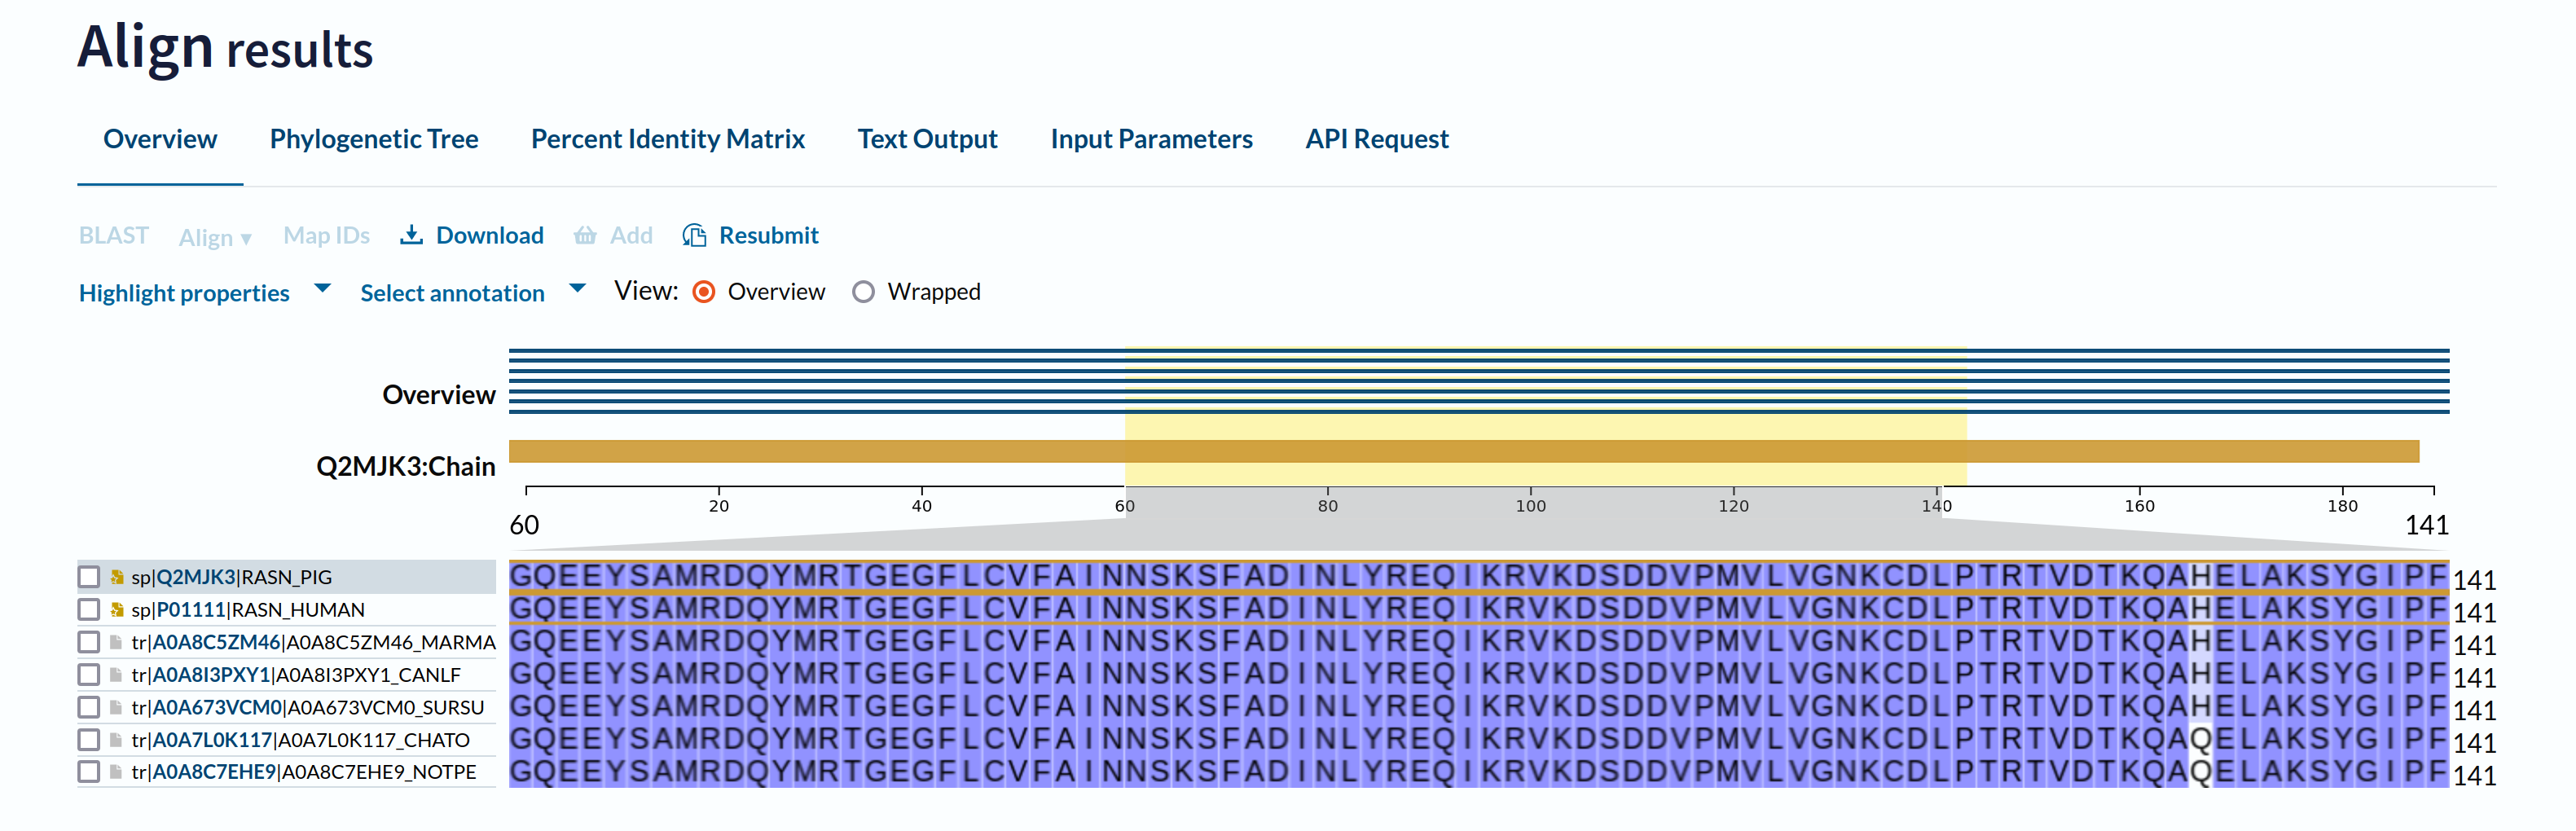

**Question 12)** Répétez la même analyse pour le gène **OR51B2** et la mutation à **S163**. Observez-vous des mutations? Qu'est-ce que cela peut signifier ?  

Puor les aligner, considérez les espèces suivantes
- Q9Y5P1 - Homo sapiens
- G3QY66 - Gorilla gorilla gorilla
- F8VPZ8 - Mus musculus
- A0A8C0K7R0 - Canis lupus dingo

Comme vous l'avez peut-être compris, la comparaison des mutations entre espèces est une méthode potentiellement puissante pour obtenir des informations sur le risque potentiel d'une mutation particulière. Pourtant, obtenir des résultats fiables est loin d'être trivial ! Les résultats peuvent dépendre des espèces que nous incluons dans notre analyse (c'est-à-dire de celles que nous considérons comme phylogénétiquement "proches" de l'Homo Sapiens), et il s'agit là d'un domaine de recherche encore actif. 

De nombreux prédicteurs ont été développés par des chercheurs pour accéder à l'impact prévu d'une mutation, et vous pouvez même en trouver certains sur TCGA. Si vous retournez à la page des mutations du patient TCGA-D9-A1JX : https://portal.gdc.cancer.gov/cases/f505058f-74f2-4476-887f-06590a605980 (en bas de la page), vous trouverez une colonne "Impact". Essayez de comprendre quelles informations elle contient. 
Certains prédicteurs utilisent une approche similaire à ce que vous venez de faire !


Il est clair que la conservation d'un résidu n'est pas le seul facteur qui détermine l'importance d'une mutation. Il faut aussi tenir compte de la "fréquence" d'une mutation. Si une mutation est partagée par de nombreux patients, il est plus probable qu'il s'agisse d'une mutation importante plutôt qu'une autre mutation observée une seule fois chez un seul patient !
Regardez la mutation NRAS - Q61R et sur le OR51B2 - S163L et la BRAF - V640E. Laquelle est la plus commune ?

**Félicitations, vous avez terminé ce tutoriel avec succès !**